In [195]:
!pip install --upgrade gapminder

In [196]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

In [197]:
import gapminder

In [198]:
college = pd.read_csv("College.csv")
college.index.name='College'
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

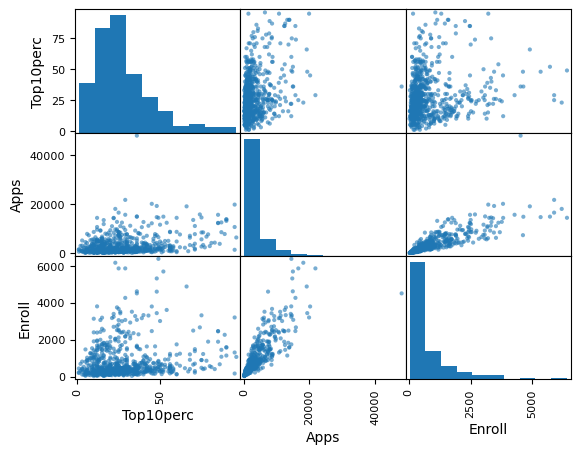

In [392]:
columns = ['Top10perc','Apps','Enroll']
pd.plotting.scatter_matrix(college[columns], alpha=0.6)

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

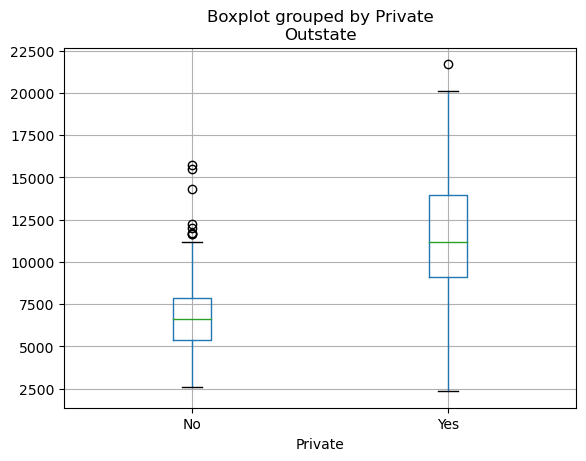

In [200]:
college.boxplot(column='Outstate', by='Private')

In [201]:
college['Elite'] = pd.cut(college['Top10perc'], bins = [0,50,100], labels=['Not Elite', 'Elite'], right=False)

In [202]:
college.value_counts("Elite")

Elite
Not Elite    694
Elite         83
Name: count, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

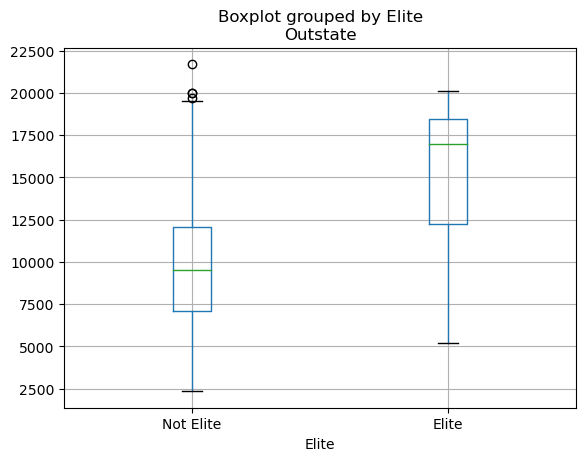

In [203]:
college.boxplot(column='Outstate', by='Elite')

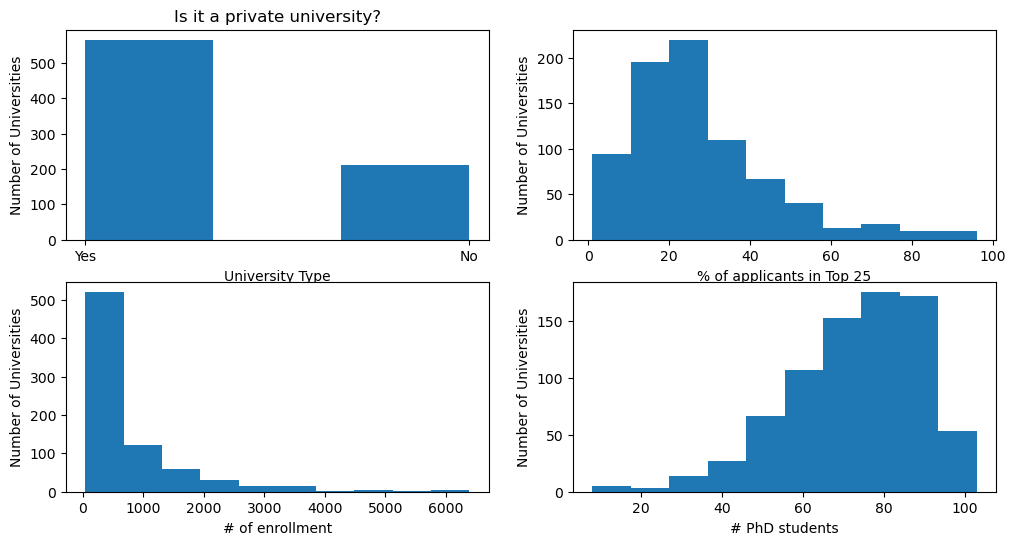

In [233]:
fig, axs= plot.subplots(2,2, figsize=(12,6))
axs[0,0].hist(college['Private'], bins=3)
axs[0,0].set_xlabel('University Type')
axs[0,0].set_ylabel('Number of Universities')
axs[0,0].set_title('Is it a private university?')

axs[0,1].hist(college['Top10perc'])
axs[0,1].set_xlabel('% of applicants in Top 25')
axs[0,1].set_ylabel('Number of Universities')

axs[1,0].hist(college['Enroll'])
axs[1,0].set_xlabel('# of enrollment')
axs[1,0].set_ylabel('Number of Universities')

axs[1,1].hist(college['PhD'])
axs[1,1].set_xlabel('# PhD students')
axs[1,1].set_ylabel('Number of Universities')



plot.show()

In [286]:
auto = pd.read_csv("Auto.csv")
auto.index.name='Auto'
auto.dropna(inplace=True)

In [287]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto.dropna(subset=['horsepower'], inplace=True)

In [288]:
quantitative_predictors = auto.select_dtypes(include='number')
quantitative_predictors.drop(columns=['origin'], inplace=True)
quantitative_predictors



,mpg,cylinders,displacement,horsepower,weight,acceleration,year
Auto,,,,,,,
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82
393,44.0,4,97.0,52.0,2130,24.6,82
394,32.0,4,135.0,84.0,2295,11.6,82


In [289]:
for i in quantitative_predictors.columns:
   print(f"Column '{i}': Min = {quantitative_predictors[i].min()}, Max = {quantitative_predictors[i].max()}")




Column 'mpg': Min = 9.0, Max = 46.6
Column 'cylinders': Min = 3, Max = 8
Column 'displacement': Min = 68.0, Max = 455.0
Column 'horsepower': Min = 46.0, Max = 230.0
Column 'weight': Min = 1613, Max = 5140
Column 'acceleration': Min = 8.0, Max = 24.8
Column 'year': Min = 70, Max = 82


In [292]:
for i in quantitative_predictors.columns:
    mean = quantitative_predictors[i].mean()
    std_dev = quantitative_predictors[i].std()
    print(f" {i}, Mean: {mean}, Standard Deviation: {std_dev}")

 mpg, Mean: 23.445918367346938, Standard Deviation: 7.805007486571798
 cylinders, Mean: 5.471938775510204, Standard Deviation: 1.7057832474527843
 displacement, Mean: 194.41198979591837, Standard Deviation: 104.64400390890465
 horsepower, Mean: 104.46938775510205, Standard Deviation: 38.49115993282855
 weight, Mean: 2977.5841836734694, Standard Deviation: 849.4025600429494
 acceleration, Mean: 15.541326530612244, Standard Deviation: 2.7588641191880816
 year, Mean: 75.9795918367347, Standard Deviation: 3.6837365435778318


In [301]:
auto_subset = quantitative_predictors.drop(quantitative_predictors.index[9:85])
subset_stats = auto_subset.describe()
range_values = subset_stats.loc[['min', 'max']]
mean_values = subset_stats.loc['mean']
std_dev_values = subset_stats.loc['std']
print("Range:")
print(range_values)
print("\nMean:")
print(mean_values)
print("\nStandard deviation:")
print(std_dev_values)

Range:
      mpg  cylinders  displacement  horsepower  weight  acceleration  year
min  11.0        3.0          68.0        46.0  1649.0           8.5  70.0
max  46.6        8.0         455.0       230.0  4997.0          24.8  82.0

Mean:
mpg               24.404430
cylinders          5.373418
displacement     187.240506
horsepower       100.721519
weight          2935.971519
acceleration      15.726899
year              77.145570
Name: mean, dtype: float64

Standard deviation:
mpg               7.867283
cylinders         1.654179
displacement     99.678367
horsepower       35.708853
weight          811.300208
acceleration      2.693721
year              3.106217
Name: std, dtype: float64


array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='horsepower', ylabel='displacement'>,
        <Axes: xlabel='weight', ylab

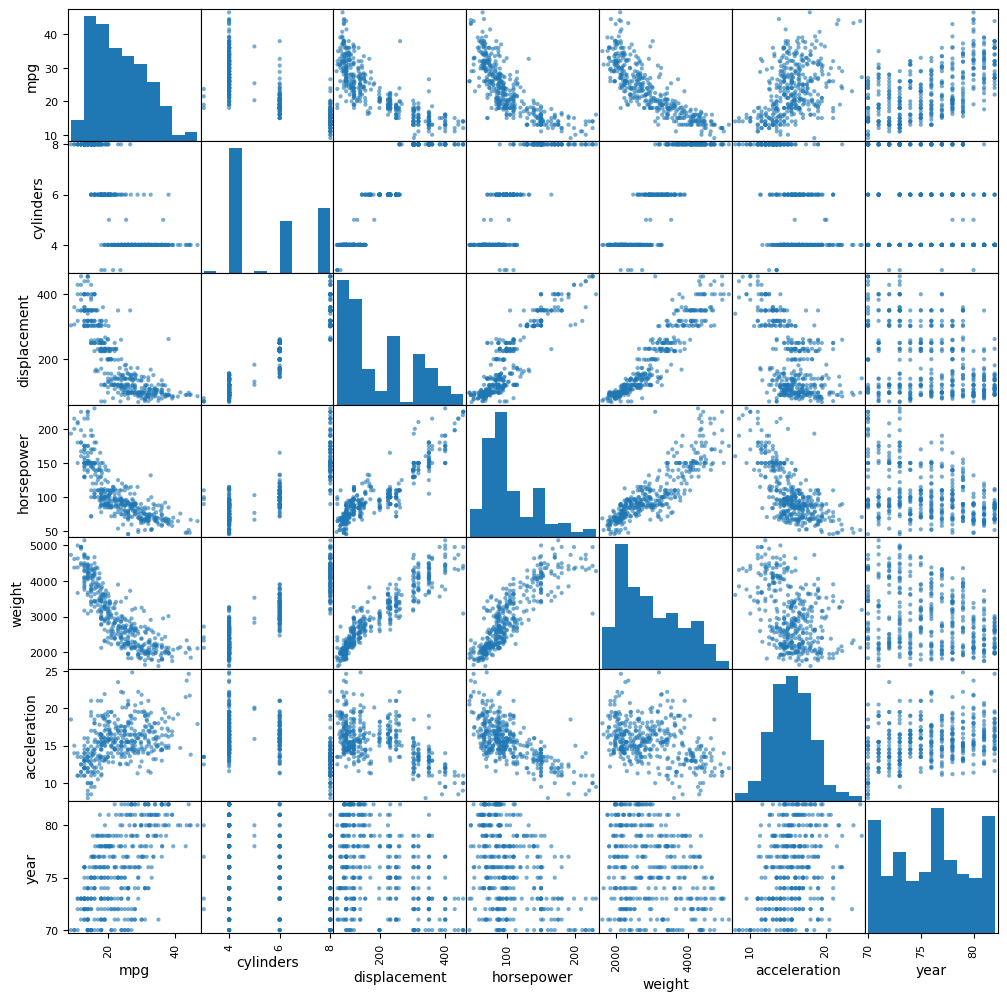

In [393]:
pd.plotting.scatter_matrix(quantitative_predictors, alpha=0.6, figsize=(12, 12))


In [41]:
gdpcapita = pd.read_csv("gdp_pcap.csv")
lif_x = pd.read_csv("lex.csv")
merged= pd.merge(gdpcapita, lif_x, on="country")
cleaned= merged.dropna()

In [55]:
gdp_per_capita_2023 = cleaned['2023_x']
life_expectancy_2023 = cleaned['2023_y']

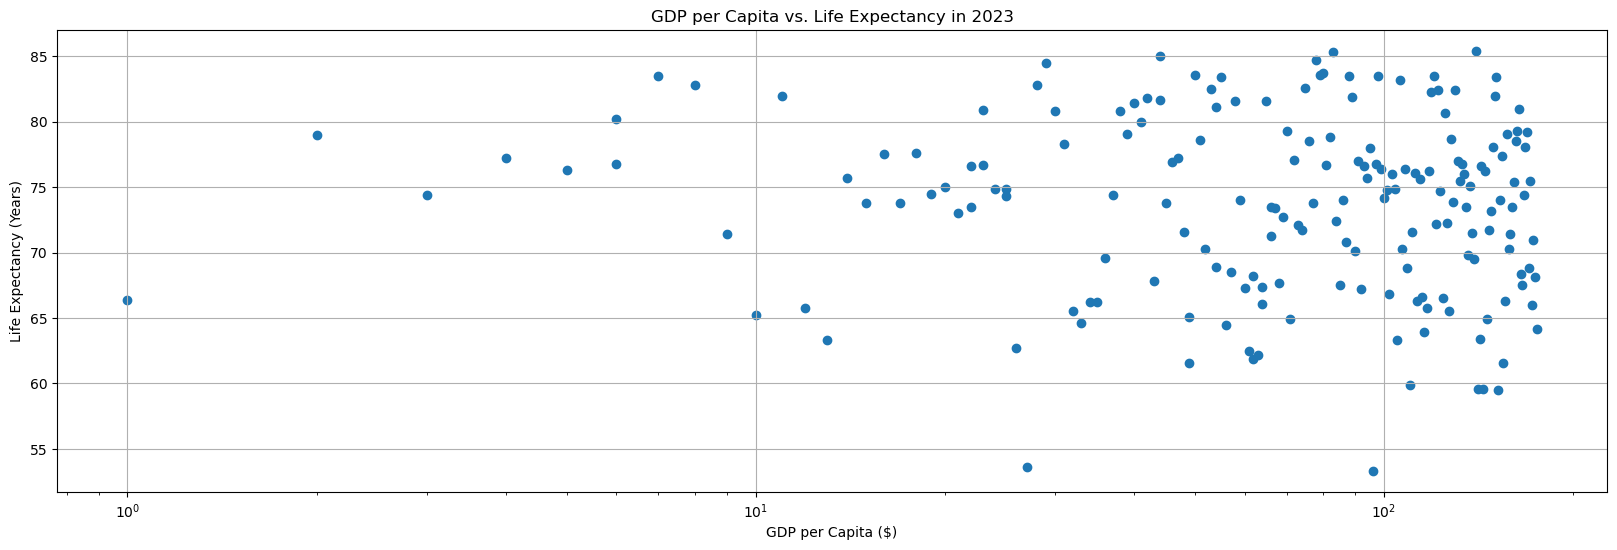

In [59]:
plot.figure(figsize=(20,6))
plot.scatter(gdp_per_capita_2023, life_expectancy_2023)
plot.title('GDP per Capita vs. Life Expectancy in 2023')
plot.xlabel('GDP per Capita ($)')
plot.xscale('log')
plot.ylabel('Life Expectancy (Years)')
plot.grid(True)
plot.show()

In [81]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [250]:
female_alive = titanic[(titanic["sex"]=="female") & (titanic["alive"]=="yes")]
male_alive = titanic[(titanic["sex"]=="male") & (titanic["alive"]=="yes")]
female_dead = titanic[(titanic["sex"]=="female") & (titanic["alive"]=="no")]
male_dead = titanic[(titanic["sex"]=="male") & (titanic["alive"]=="no")]


genders = ['Male','Female']
survivor = [len(male_alive), len(female_alive)]
casualty = [len(male_dead), len(female_dead)]

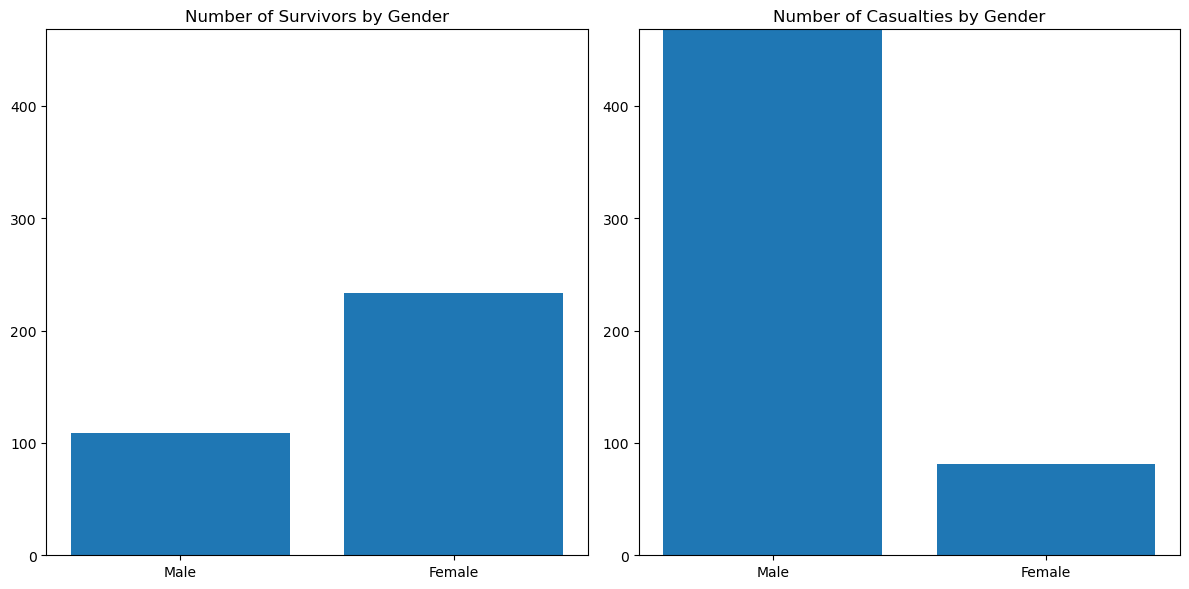

In [116]:
fig, axs= plot.subplots(1,2, figsize=(12,6))
axs[0].bar(genders, survivor)
axs[0].set_title('Number of Survivors by Gender')
axs[1].bar(genders,casualty)
axs[1].set_title('Number of Casualties by Gender')
max_value = max(max(survivor), max(casualty))
axs[0].set_ylim(0, max_value)
axs[1].set_ylim(0, max_value)
plot.tight_layout()
plot.show()

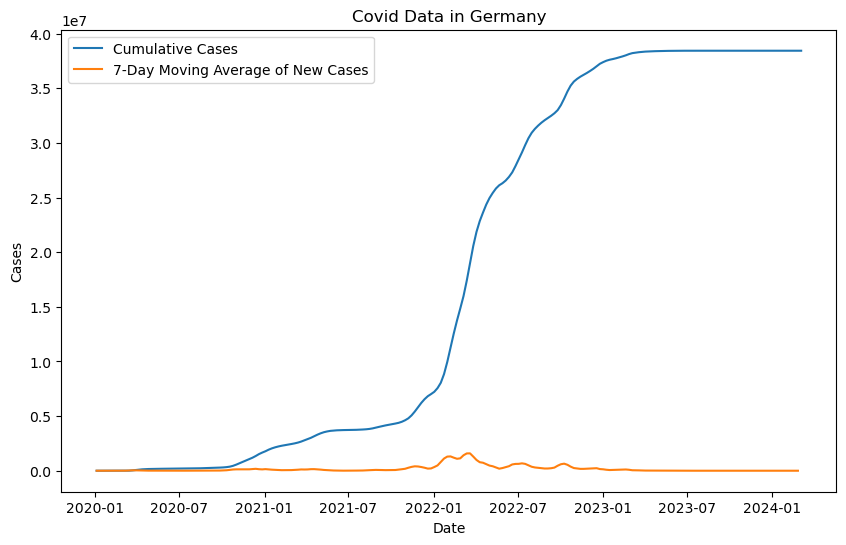

In [388]:
covid = pd.read_csv("WHO-COVID-19-global-data.csv")
germany_data = covid[covid["Country"] == 'Germany'].copy()
germany_data["Date_reported"] = pd.to_datetime(germany_data["Date_reported"])
seven_day_avg = []

for i in range(len(germany_data) - 1):
    change = germany_data.iloc[i+1]['Cumulative_cases'] - germany_data.iloc[i]['Cumulative_cases'] 
    seven_day_avg.append(change)

seven_day_avg.append(np.nan)
germany_data['7day_avg'] = seven_day_avg    
    

plot.figure(figsize=(10, 6))
plot.plot(germany_data["Date_reported"], germany_data["Cumulative_cases"], label='Cumulative Cases')
plot.plot(germany_data["Date_reported"], germany_data["7day_avg"], label='7-Day Moving Average of New Cases')
plot.title('Covid Data in Germany')
plot.xlabel('Date')
plot.ylabel('Cases')
plot.legend()
plot.show()